In [9]:
%matplotlib inline
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt

tpfs = search_targetpixelfile('KIC 6679295').download_all()

In [10]:
# Build the light curve
pipeline_lc = tpfs[0].to_lightcurve().flatten()
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten())

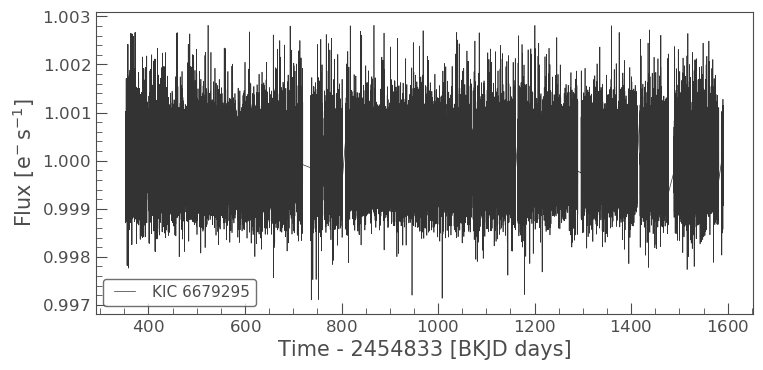

In [11]:
# Clean the light curve
pipeline_lc = pipeline_lc.remove_nans().remove_outliers()
pipeline_lc.plot()

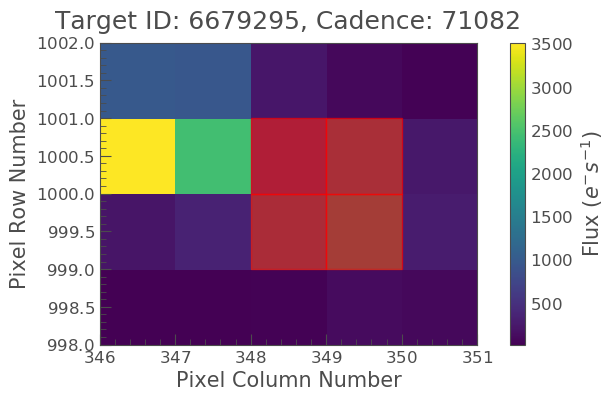

In [39]:
tpf.plot(frame=100, aperture_mask=tpf.pipeline_mask, mask_color='red');


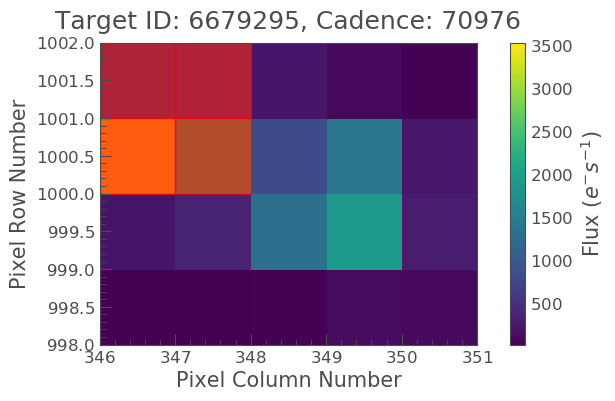

In [40]:
import numpy as np
aper = np.zeros(tpf.shape[1:], dtype=np.int)
aper[-2:, 0:2] = 1
tpf.plot(aperture_mask=aper, mask_color='red');

In [41]:
# Build the NEW aperture, and the light curve
aper = np.zeros(tpfs[0].shape[1:])
aper[-2:, 0:2] = 1
user_lc = tpfs[0].to_lightcurve(aperture_mask=aper.astype(bool)).flatten()
for tpf in tpfs:
    aper = np.zeros(tpf.shape[1:])
    aper[-2:, 0:2]=1
    user_lc = user_lc.append(tpf.to_lightcurve(aperture_mask=aper.astype(bool)).flatten())

# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()

(0.998, 1.0015)

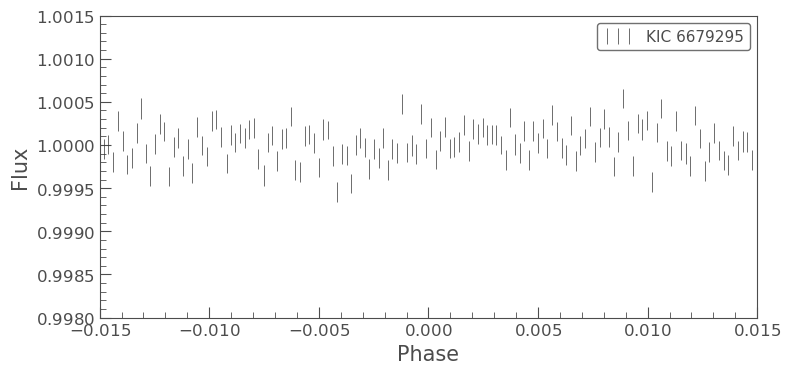

In [42]:
user_lc.fold(period=24.57537, t0=-0.133).bin().errorbar();
plt.xlim(-0.015,0.015)
plt.ylim(0.998,1.0015)

In [43]:
import lightkurve as lk
tpf = lk.search_targetpixelfile("Kepler-10", quarter=3).download(quality_bitmask='hardest')

Fitting cadences: 100%|██████████| 3634/3634 [02:29<00:00, 24.23it/s]


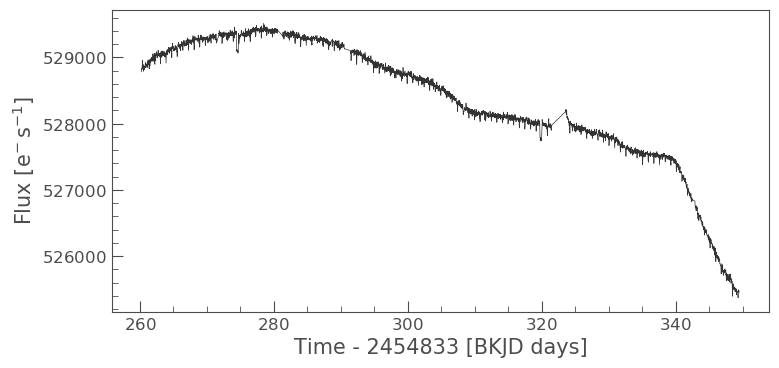

In [44]:
lc = tpf.to_lightcurve(method='prf')
lc.plot()

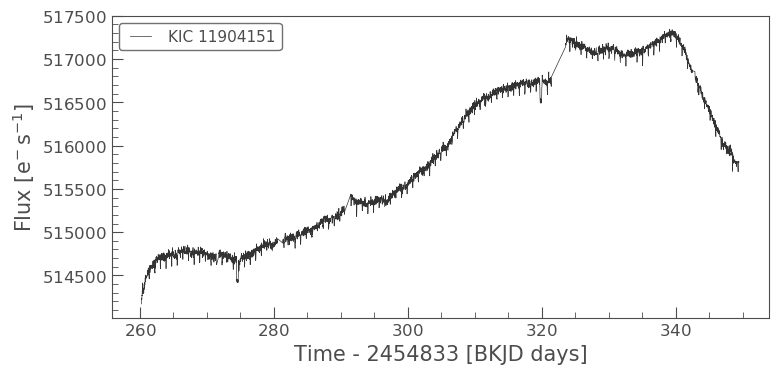

In [45]:
lc_aper = tpf.to_lightcurve(method='aperture')
lc_aper.plot()

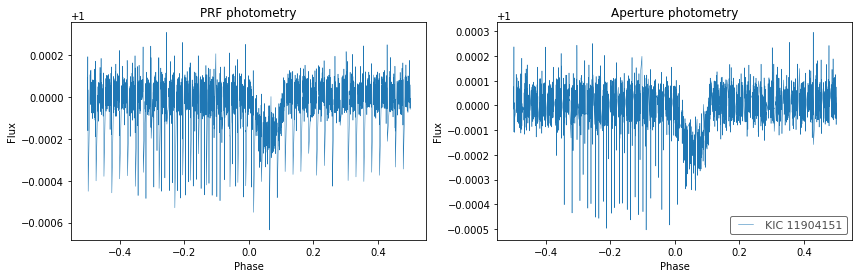

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
ax[0].set_title('PRF photometry')
lc.flatten().fold(period=0.8376).plot(ax=ax[0])
ax[1].set_title('Aperture photometry')
lc_aper.flatten().fold(period=0.8376).plot(ax=ax[1])

In [48]:
print("""The CDPP noise metric equals:
{:.1f} ppm for PRF-fitting photometry;
{:.1f} ppm for aperture photometry.""".format(lc.estimate_cdpp(), lc_aper.estimate_cdpp()))

The CDPP noise metric equals:
48.6 ppm for PRF-fitting photometry;
33.4 ppm for aperture photometry.


In [49]:
model = tpf.get_model()
type(model)

lightkurve.prf.tpfmodel.TPFModel

In [50]:

model.star_priors[0].col

<GaussianPrior(mean=[655.70045778], var=[0.00046541])>

In [51]:
model.background_prior.flux

<GaussianPrior(mean=[138.52747], var=[145.87004587])>

In [52]:
print(model)

  <StarPrior(
    col=<GaussianPrior(mean=[655.70045778], var=[0.00046541])>
    row=<GaussianPrior(mean=[246.83753465], var=[0.0007464])>
    flux=<UniformPrior(lb=[83941.5390625], ub=[1066484.375])>
    targetid=11904151)>
  <BackgroundPrior(
    flux=<GaussianPrior(mean=[138.52747], var=[145.87004587])>)>
  <FocusPrior(
    scale_col=<GaussianPrior(mean=[1], var=[0.0001])>
    scale_row=<GaussianPrior(mean=[1], var=[0.0001])>
    rotation_angle=<UniformPrior(lb=[-3.1415], ub=[3.1415])>)>
  <MotionPrior(
    shift_col=<GaussianPrior(mean=[0], var=[1.])>
    shift_row=<GaussianPrior(mean=[0], var=[1.])>)>
  fit_background=True
  fit_focus=False
  fit_motion=False



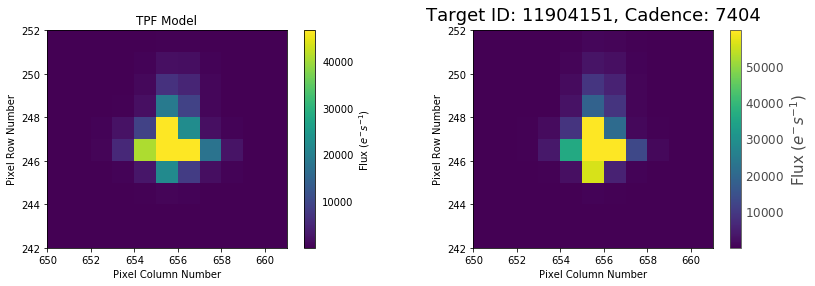

In [53]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
model.plot(ax=ax[0])
tpf.plot(ax=ax[1]);

In [54]:
parameters = model.fit(tpf.flux[0] + tpf.flux_bkg[0])
print(parameters)

  <StarParameters(
    col=655.6409995230879
    row=246.75968144624395
    flux=528783.6252248927
    targetid=None)>
  <BackgroundParameters(
    flux=175.21544001684765
    fitted=True)>
  <FocusParameters(
    scale_col=[1]
    scale_row=[1]
    rotation_angle=[0.]
    fitted=False)>
  <MotionParameters(
    shift_col=[0]
    shift_row=[0]
    fitted=False)>
  residual_image:
    [ 13.54472234 -24.96701167 -36.46893428 -36.42862056...
  predicted_image:
    [175.21544002 175.21544002 175.21544002 175.21544002...



In [55]:
parameters.stars[0].flux


528783.6252248927

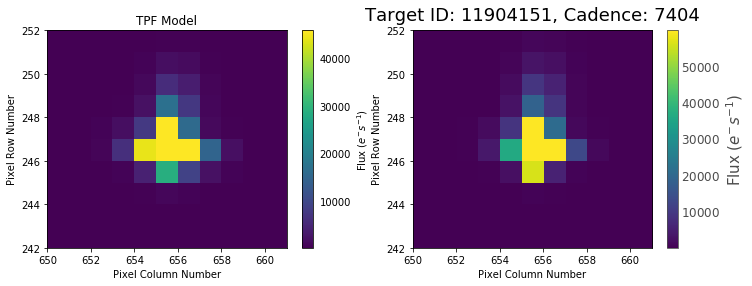

In [56]:

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
model.plot(parameters, ax=ax[0])
tpf.plot(ax=ax[1])

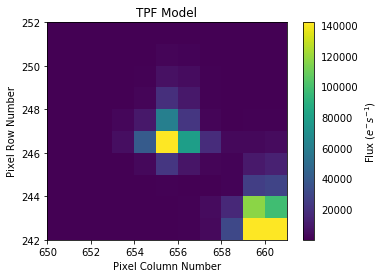

In [57]:
from lightkurve.prf import StarPrior
model = tpf.get_model()
model.star_priors.append(StarPrior(col=660, row=243, flux=1e6))
model.plot()

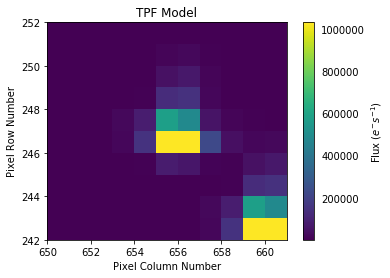

In [58]:
from lightkurve.prf import TPFModel, StarPrior, BackgroundPrior, FocusPrior, MotionPrior
from lightkurve.prf import GaussianPrior, UniformPrior, FixedValuePrior
model = TPFModel(star_priors=[StarPrior(col=GaussianPrior(mean=656, var=1),
                                        row=GaussianPrior(mean=247, var=1),
                                        flux=UniformPrior(lb=0, ub=1e7)),
                              StarPrior(col=FixedValuePrior(value=660),
                                        row=FixedValuePrior(value=243),
                                        flux=UniformPrior(lb=0, ub=1e7))],
                 background_prior=BackgroundPrior(flux=GaussianPrior(mean=100., var=10.)),
                 focus_prior=FocusPrior(scale_col=GaussianPrior(mean=1, var=0.0001),
                                        scale_row=GaussianPrior(mean=1, var=0.0001),
                                        rotation_angle=UniformPrior(lb=-3.1415, ub=3.1415)),
                 motion_prior=MotionPrior(shift_col=GaussianPrior(mean=0., var=0.01),
                                          shift_row=GaussianPrior(mean=0., var=0.01)),
                 prfmodel=tpf.get_prf_model(),
                 fit_background=True,
                 fit_focus=False,
                 fit_motion=False)
model.plot()